In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from scipy.stats import binom

In [2]:
XXSMALL_SIZE = 8
XSMALL_SIZE = 10
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

In [3]:
alphabet = ["A", "C", "G", "T"]
kmers = []
for c1 in alphabet:
    for c2 in alphabet:
        for c3 in alphabet:
            kmers.append(c1 + c2 + c3)

In [4]:
def read_dump(file_in):
    df = pd.read_csv(file_in, sep = "\t", header = None)
    df.columns  = ["kmer", "count"]
    return df

## K-mer count histogram

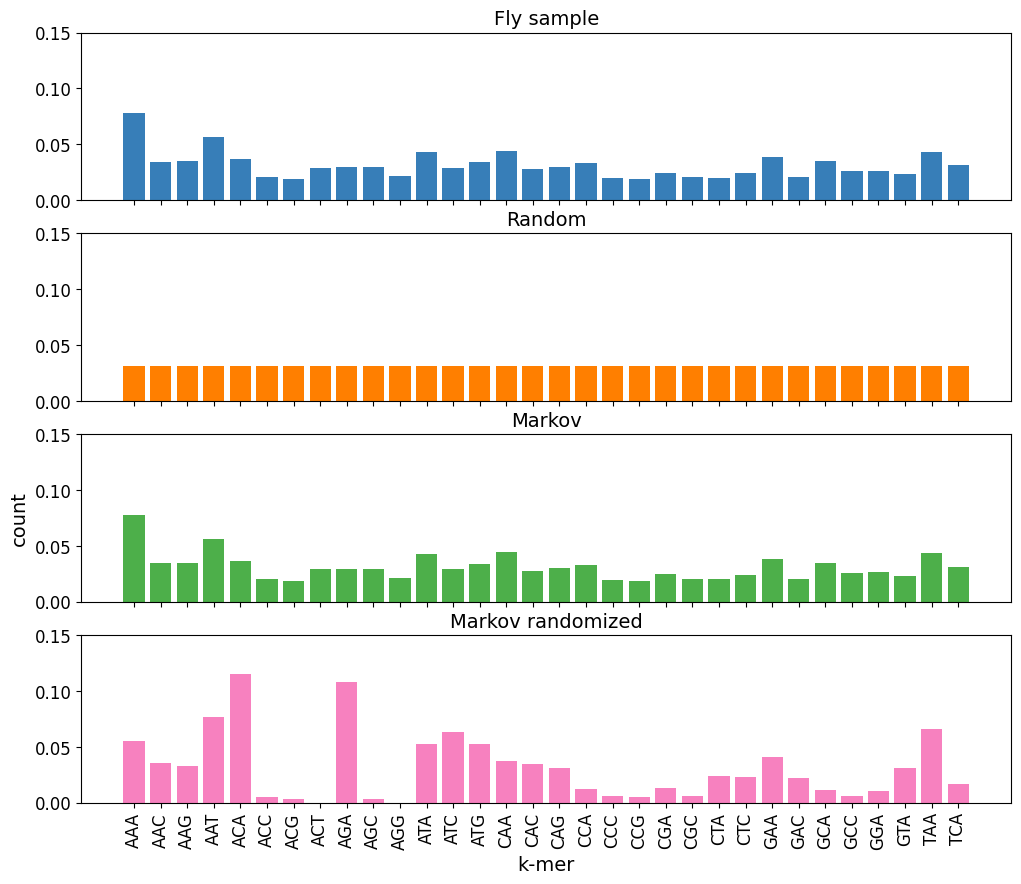

In [5]:
fig, ax = plt.subplots(4, 1, sharex = True, figsize = (12, 10))
df = read_dump("data/fly.3mer.dump")
ax[0].bar(df["kmer"], df["count"]/np.sum(df["count"]), color = CB_color_cycle[0])
ax[0].set_title("Fly sample")

df = read_dump("data/sim.3mer.dump")
ax[1].bar(df["kmer"], df["count"]/np.sum(df["count"]), color = CB_color_cycle[1])
ax[1].set_title("Random")

df = read_dump("data/sim_markov_3mer.dump")
ax[2].bar(df["kmer"], df["count"]/np.sum(df["count"]), color = CB_color_cycle[2])
ax[2].set_title("Markov")

df = read_dump("data/sim_markov_rand_3mer.dump")
ax[3].bar(df["kmer"], df["count"]/np.sum(df["count"]), color = CB_color_cycle[3])
ax[3].set_title("Markov randomized")

ax[2].set_ylabel("count")
ax[3].set_xlabel("k-mer")

for i in range(4):
    ax[i].set_ylim(0, 0.15)

xt = plt.xticks(rotation = "vertical")

## K-mer abundance histogram

In [9]:
def read_occ_table(path):
    df = pd.read_csv(path, sep = "\t", header = None)
    df.columns = ["count", "occurrences"]
    df["frequency"] = df["count"] / np.sum(df["count"])
    if (abs(1 - np.sum(df["frequency"])) > 0.05):
        print("Incorrect frequency")
    return df

In [10]:
fly_occ = read_occ_table("data/fly_k11.tsv")
fly_occ.head()

,count,occurrences,frequency
0,329,1,0.000157
1,895,2,0.000427
2,1929,3,0.000920
3,3453,4,0.001647
4,5152,5,0.002457


In [11]:
mouse_occ = read_occ_table("data/from_mouse_o3.k11.tsv")
mouse_occ.head()

,count,occurrences,frequency
0,35215,1,0.016983
1,42372,2,0.020435
2,42528,3,0.020510
3,37170,4,0.017926
4,29600,5,0.014275


In [12]:
mason_occ = read_occ_table("data/sim_mason_k11.tsv")
mason_occ.head()

,count,occurrences,frequency
0,2,31,9.536743e-07
1,2,32,9.536743e-07
2,2,33,9.536743e-07
3,7,34,3.337860e-06
4,17,35,8.106232e-06


In [13]:
markov_occ = read_occ_table("data/sim_markov_k11.tsv")
markov_occ.head()

,count,occurrences,frequency
0,13,1,0.000006
1,52,2,0.000025
2,172,3,0.000082
3,406,4,0.000194
4,768,5,0.000366


In [14]:
markov_rand_occ = read_occ_table("data/sim_markov_rand_k11.tsv")
markov_rand_occ.head()

,count,occurrences,frequency
0,13751,1,0.024319
1,17102,2,0.030245
2,18715,3,0.033098
3,18170,4,0.032134
4,17527,5,0.030997


In [15]:
def plot_abundance(ax, df, abundance_thresh, max_freq, name, colorname):
    df_low_abundance = df.loc[df['occurrences'] <= abundance_thresh]
    ax.bar(df_low_abundance["occurrences"], df_low_abundance["frequency"], width = 1.0, color = colorname, label = name, alpha=0.65)
    #ax.legend(loc = "upper right")
    ax.set_xlim([-abundance_thresh*0.01, abundance_thresh])
    ax.set_ylim(0, max_freq)
    #ax.set_title(name, fontsize = MEDIUM_SIZE)

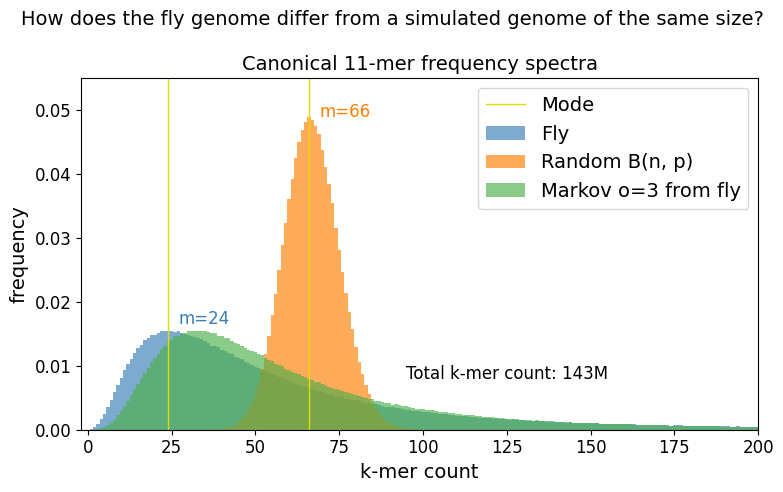

In [107]:
fig, ax = plt.subplots(1)
fig.set_figheight(5)
fig.set_figwidth(8)
fig.suptitle("How does the fly genome differ from a simulated genome of the same size?")

# plot binomial trial
# ax.plot(maso_occ["occurrences"], rand_occ["frequency"], color = CB_color_cycle[6], label = "B(n,p)", alpha = 0.5)

plot_abundance(ax, fly_occ, 200, 0.055, "Fly", CB_color_cycle[0])
plot_abundance(ax, mason_occ, 200, 0.055, "Random B(n, p)", CB_color_cycle[1])
plot_abundance(ax, markov_occ, 200, 0.055, "Markov o=3 from fly", CB_color_cycle[2])

ab_mode = fly_occ["occurrences"][np.argmax(fly_occ["count"])]
ax.axvline(ab_mode, linewidth = 1, label = "Mode", color = CB_color_cycle[8])
ax.text(ab_mode + 3, fly_occ["frequency"][np.argmax(fly_occ["count"])] + 0.001, "m=" + str(ab_mode), size = SMALL_SIZE, color = CB_color_cycle[0])

ab_mode = mason_occ["occurrences"][np.argmax(mason_occ["count"])]
ax.axvline(ab_mode, linewidth = 1, color = CB_color_cycle[8])
ax.text(ab_mode + 3, mason_occ["frequency"][np.argmax(mason_occ["count"])], "m=" + str(ab_mode), size = SMALL_SIZE, color = CB_color_cycle[1])

#ab_mode = rand_occ["occurrences"][np.argmax(rand_occ["count"])]
#ax.axvline(ab_mode, linewidth = 1, color = CB_color_cycle[4], alpha = 0.75)

ax.text(95, 0.008, "Total k-mer count: 143M", size = SMALL_SIZE)
#ax.text(95, 0.004, "E(x)=" + str(round(np.sum(markov_occ["count"] * markov_occ["occurrences"]) / np.sum(markov_occ["count"]))), size = XSMALL_SIZE)

#ax.text(110, 0.005, "Max k-mer count: " + str(np.max(fly_occ["occurrences"])), size = XSMALL_SIZE, color = c_darkgreen)
#ax.text(110, 0.02, "Total k-mer count: " + str(np.sum(markov_occ["count"] * markov_occ["occurrences"])), size = XSMALL_SIZE, color = CB_color_cycle[6])

ax.set_title("Canonical 11-mer frequency spectra")

ax.legend(loc = "upper right")
ax.set_xlabel("k-mer count")
ax.set_ylabel("frequency")

#handles, labels = ax1.get_legend_handles_labels()
#fig.legend(handles, labels, bbox_to_anchor=(0.935,0.75))

fig.tight_layout()
fig.savefig('140Mb_spectra_RM.png', dpi = 200)

In [74]:
mouse_occ = read_occ_table("data/mouse.k11.tsv")
mouse_occ.head()

,count,occurrences,frequency
0,1,62,4.768372e-07
1,1,64,4.768372e-07
2,3,66,1.430511e-06
3,2,67,9.536743e-07
4,5,68,2.384186e-06


In [75]:
human_occ = read_occ_table("data/from_human.k11.tsv")
human_occ.head()

,count,occurrences,frequency
0,127,1,0.000061
1,196,2,0.000093
2,350,3,0.000167
3,411,4,0.000196
4,557,5,0.000266


In [76]:
n = 2762326647
p = 2/(4**11)
x = np.arange(binom.ppf(0.001, n, p),
              binom.ppf(0.999, n, p))

In [77]:
np.argmax(human_occ["count"])

np.int64(52)

In [78]:
human_occ[human_occ["count"] == np.max(human_occ["count"])]

,count,occurrences,frequency
52,2929,53,0.001397


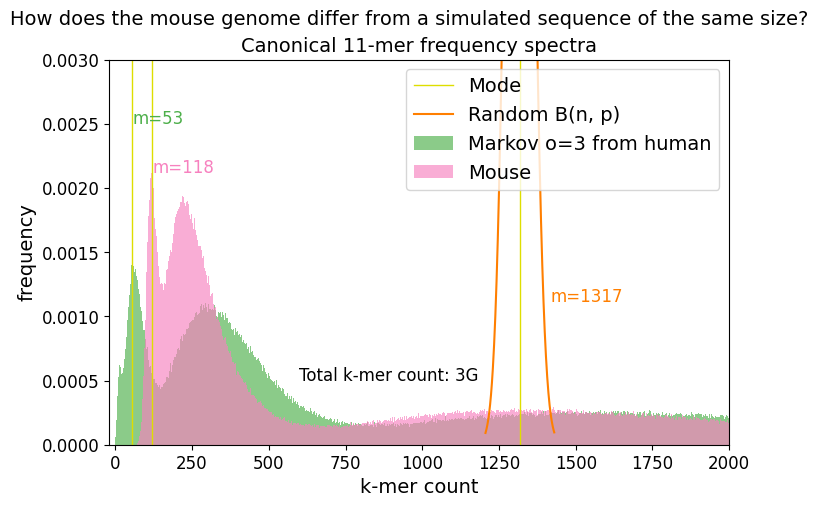

In [116]:
fig, ax = plt.subplots(1)
fig.set_figheight(5)
fig.set_figwidth(8)
fig.suptitle("How does the mouse genome differ from a simulated sequence of the same size?")

plot_abundance(ax, human_occ, 2000, 0.003, "Markov o=3 from human", CB_color_cycle[2])
#plot_abundance(ax, mason_occ, 200, 0.055, "Random", CB_color_cycle[1])
plot_abundance(ax, mouse_occ, 2000, 0.003, "Mouse", CB_color_cycle[3])

ab_mode = human_occ["occurrences"][np.argmax(human_occ["count"])]
ax.axvline(ab_mode, linewidth = 1, label = "Mode", color = CB_color_cycle[8])
ax.text(ab_mode + 3, 0.0025, "m=" + str(ab_mode), size = SMALL_SIZE, color = CB_color_cycle[2])

ab_mode = mouse_occ["occurrences"][np.argmax(mouse_occ["count"])]
ax.axvline(ab_mode, linewidth = 1, color = CB_color_cycle[8])
ax.text(ab_mode + 3, mouse_occ["frequency"][np.argmax(mouse_occ["count"])], "m=" + str(ab_mode), size = SMALL_SIZE, color = CB_color_cycle[3])

ax.plot(x, binom.pmf(x, n, p), color = CB_color_cycle[1], ms=8, label='Random B(n, p)')
#ax.vlines(x, 0, binom.pmf(x, n, p), color = CB_color_cycle[1], colors='b', lw=5, alpha=0.03, label = "Random B(n, p)")
ab_mode = int(n * p)
#ax.axvline(ab_mode, linewidth = 1, color = CB_color_cycle[1], alpha = 0.75)
ax.axvline(ab_mode, linewidth = 1, color = CB_color_cycle[8])
ax.text(ab_mode + 100, mouse_occ["frequency"][np.argmax(mouse_occ["count"])] - 0.001, "m=" + str(ab_mode), size = SMALL_SIZE, color = CB_color_cycle[1])

#ab_mode = rand_occ["occurrences"][np.argmax(rand_occ["count"])]
#ax.axvline(ab_mode, linewidth = 1, color = CB_color_cycle[4], alpha = 0.75)

#ax.text(95, 0.008, "Total k-mer count: 143M", size = XSMALL_SIZE)
#ax.text(95, 0.004, "E(x)=" + str(round(np.sum(markov_occ["count"] * markov_occ["occurrences"]) / np.sum(markov_occ["count"]))), size = XSMALL_SIZE)

#ax.text(110, 0.005, "Max k-mer count: " + str(np.max(fly_occ["occurrences"])), size = XSMALL_SIZE, color = c_darkgreen)
#ax.text(110, 0.02, "Total k-mer count: " + str(np.sum(markov_occ["count"] * markov_occ["occurrences"])), size = XSMALL_SIZE, color = CB_color_cycle[6])

ax.text(600, 0.0005, "Total k-mer count: 3G", size = SMALL_SIZE)

ax.set_title("Canonical 11-mer frequency spectra")

ax.legend(loc = "upper right")
ax.set_xlabel("k-mer count")
ax.set_ylabel("frequency")

#handles, labels = ax1.get_legend_handles_labels()
#fig.legend(handles, labels, bbox_to_anchor=(0.935,0.75))

fig.savefig('mouse_vs_human.pdf', dpi = 200)
plt.show()